In [1]:
# importing libraries 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np

# Problem Statement
Prepare a prediction model for profit of 50_startups data.
Do transformations for getting better predictions of profit and
make a table containing R^2 value for each prepared model.

R&D Spend -- Research and devolop spend in the past few years
Administration -- spend on administration in the past few years
Marketing Spend -- spend on Marketing in the past few years
State -- states from which data is collected
Profit  -- profit of each state in the past few years

In [2]:
#Read the data
startup = pd.read_csv("50_Startups.csv")
startup.head(10)

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


# 1. EDA

In [3]:
#columns information from the Startup dataset
startup.info()

# 5 columns and 50 rows with no NUll values.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [4]:
startup['State'].unique()  # data is from 3 states only.



array(['New York', 'California', 'Florida'], dtype=object)

In [5]:
startup

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [6]:
#But the state value is not needed to find out the profit made (assumption)
#dropping off the column

startup1= startup.drop(['State'], axis=1)  #created a new dataframe withought column State*

startup1.head()

,R&D Spend,Administration,Marketing Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


In [7]:
import plotly.express as px
startup['ID'] = startup1.index + 1

state_wise =  startup[['State','Profit']]
fig = px.bar(x = [i for i in state_wise['State']],y = [i for i in state_wise['Profit']],color=[i for i in state_wise['State']],)
fig.update_layout(xaxis_title = 'State',yaxis_title = 'Profit',title = 'Distribution of Profit(state_wise)')
fig.show()

# profit is shown statewise
'''observation:
Claifornia State has lesser profit as compared to other states..
and minimum and maximum profit earned by companies can also be seen from the bar plot below '''

'observation:\nClaifornia State has lesser profit as compared to other states..\nand minimum and maximum profit earned by companies can also be seen from the bar plot below '

In [8]:
#state_wise =  startup[['State','Profit']]
fig = px.pie(data_frame= state_wise, names = [i for i in state_wise['State']],values=[i for i in state_wise['Profit']],color=[i for i in state_wise['State']],)
fig.update_layout(xaxis_title = 'State',yaxis_title = 'Profit',title = 'Distribution of Profit(state_wise)')
fig.show()

'''profit percentage: state wise'''

'profit percentage: state wise'

'''
PROFIT column = Actual output
and we need predition value output for that column only from multiple input variables.

no. of input variables:3 ( R&D Spend, Administration, Marketing Spend)
'''

In [9]:
# renaming the columns and removing the spaces within
startup1.rename(columns = {'R&D Spend':'RandDSpend', 'Marketing Spend':'MarketingSpend'}, inplace = True)
startup1.head()

,RandDSpend,Administration,MarketingSpend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


In [10]:
# Checking column information
startup1.columns #it is showing Object type

Index(['RandDSpend', 'Administration', 'MarketingSpend', 'Profit'], dtype='object')

In [11]:
startup1.info()  #not able to figureout how this and previous statements show different data types of the columns !

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   RandDSpend      50 non-null     float64
 1   Administration  50 non-null     float64
 2   MarketingSpend  50 non-null     float64
 3   Profit          50 non-null     float64
dtypes: float64(4)
memory usage: 1.7 KB



there are 3 input variables(RandDspend, Administration, MarketingSpend) and 1 output variable (Profit),
data does not have any null values,
all the columns or predictors or input variables are in float data type.

In [12]:
startup1.describe()

,RandDSpend,Administration,MarketingSpend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


Mean, Standard Deviation values for each feature can be found through this step.
Min-max values also found out

In [13]:
startup1.head()

,RandDSpend,Administration,MarketingSpend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



"\n#boxplots\nsns.boxplot(ax=axes[1,0],x=startup1['RandDSpend'],y=,color='red')  # thus it is a normally distributed data with mean =\naxes[1,0].set_title('R&D Spend')\n\nsns.boxplot(ax=axes[1,1],x=startup1['Administration'],color='green')  # thus it is a normally distributed data with mean =\naxes[1,1].set_title('Administration Spend')\n\nsns.boxplot(ax=axes[1,2],x=startup1['MarketingSpend'])  # thus it is a normally distributed data with mean =\naxes[1,2].set_title('Marketing Spend')\n"

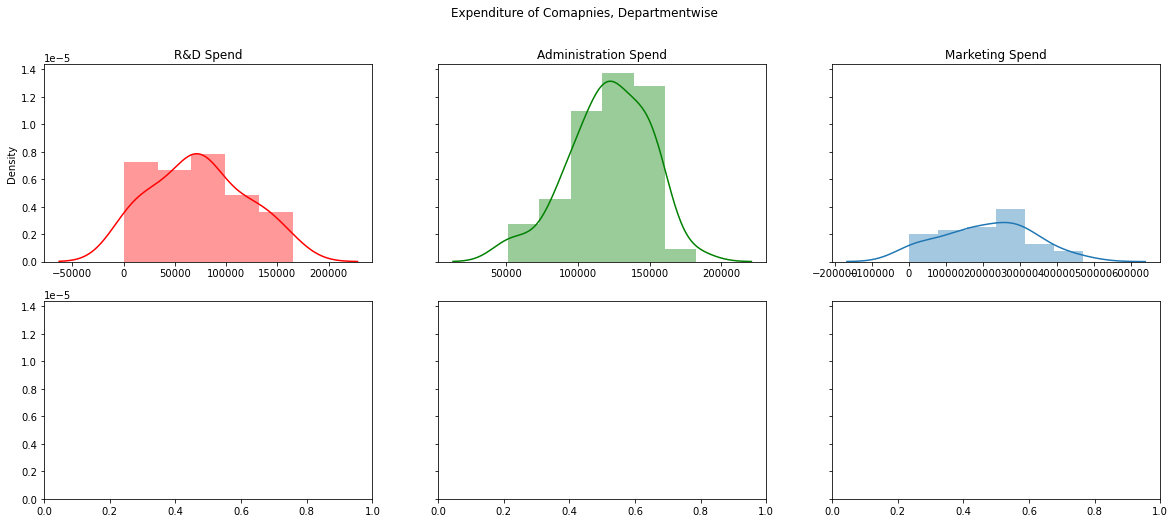

In [14]:
import seaborn as sns

fig, axes = plt.subplots(2, 3, figsize=(20, 8), sharey=True)
fig.suptitle('Expenditure of Comapnies, Departmentwise')

#distplots
p1=sns.distplot(ax=axes[0,0],x=startup1['RandDSpend'],color='red')  # thus it is a normally distributed data with mean = 73721.615600
axes[0,0].set_title('R&D Spend')

p2=sns.distplot(ax=axes[0,1],x=startup1['Administration'],color='green')  # thus it is a normally distributed data with mean =121344.639600	
axes[0,1].set_title('Administration Spend')

p3=sns.distplot(ax=axes[0,2],x=startup1['MarketingSpend'])  # thus it is a normally distributed data with mean =211025.097800	
axes[0,2].set_title('Marketing Spend')

'''
#boxplots
sns.boxplot(ax=axes[1,0],x=startup1['RandDSpend'],y=,color='red')  # thus it is a normally distributed data with mean =
axes[1,0].set_title('R&D Spend')

sns.boxplot(ax=axes[1,1],x=startup1['Administration'],color='green')  # thus it is a normally distributed data with mean =
axes[1,1].set_title('Administration Spend')

sns.boxplot(ax=axes[1,2],x=startup1['MarketingSpend'])  # thus it is a normally distributed data with mean =
axes[1,2].set_title('Marketing Spend')
'''

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



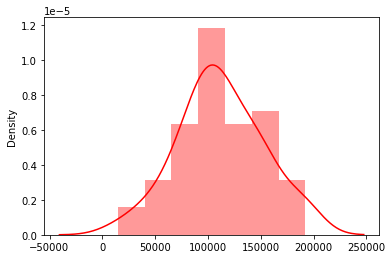

In [15]:
#distplot for output variable: Profitc
p1=sns.distplot(x=startup1['Profit'],color='red')  # thus it is a normally distributed data with mean = 112012.639200
#axes[0].set_title('Profit')


# Scatter Plot

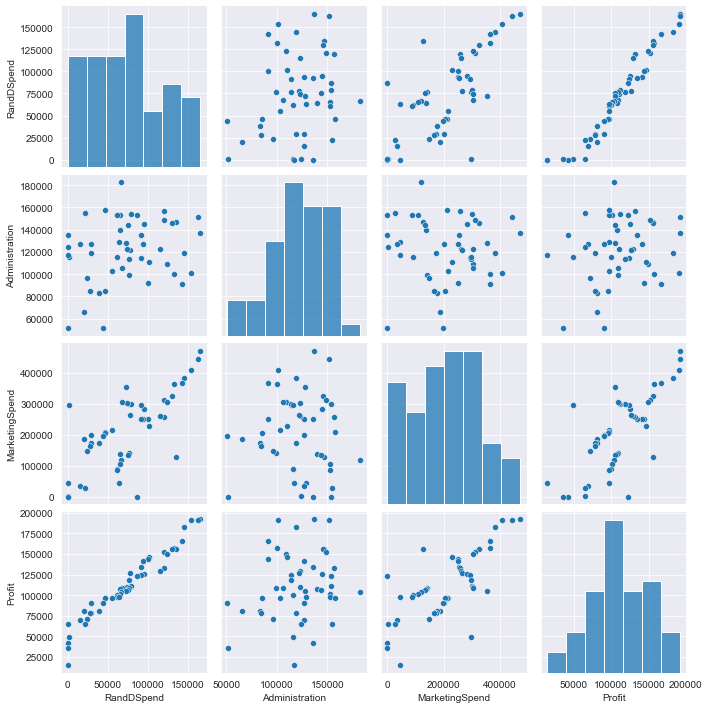

In [16]:
#Format the plot background and scatter plots for all the variables
sns.set_style(style='darkgrid')
sns.pairplot(startup1)

# correlation matrix

In [17]:
startup1.corr()

,RandDSpend,Administration,MarketingSpend,Profit
RandDSpend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
MarketingSpend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


#'correlation' between R&D_Spend or RandDspend and output variable Profile is 0.972900 (Highest or strong linear relation)
(thus this variable affects the output most*)

Administration and output variable Profile is 0.200717 (weakest linear relation)

MarketingSpend and output variable Profile is 0.747766 (moderate linear relation)

and #'collinearity' between RandDspend and MarketingSpend is 0.724248	 
(thus these 2 variables in combination will affect the output most*)


<AxesSubplot:>

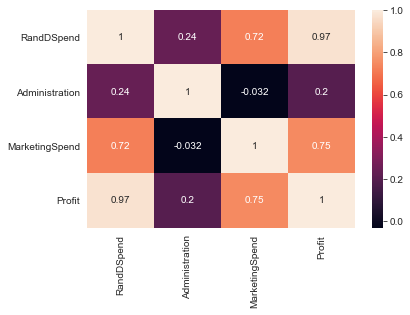

In [18]:
# heatmap for correlation matrix
sns.heatmap(startup1.corr(),annot=True)

# model building : Multi linear regression

# Model 1 : ALL FEATURES
ORDINARY LEAST SQUARE METHOD 


In [31]:
#Build model 1
 
from sklearn import linear_model

#profit prediction using all 3 input variables                

features = ['RandDSpend','Administration','MarketingSpend']
target = 'Profit'

X = startup1[features].values.reshape(-1, len(features))
y = startup1[target].values

ols =linear_model.LinearRegression()
model1 = ols.fit(X, y)

In [32]:
r2 = model1.score(X, y)  # r2 error
print(r2)


0.9507459940683246


In [33]:
model1.coef_

array([ 0.80571505, -0.02681597,  0.02722806])

In [34]:
model1.intercept_

50122.19298986524

Equation for Multi Linear regression

Y= B0 + B1* X1 + B2* X2 + B3*X3

Profit = Y Intercept + B1* RandDSpend + B2* Administration + B3* MarketingSpend

#B0= 50122.192990, B1=0.805715  B2=-0.026816 B3=0.027228

In [35]:
startup1.describe()

,RandDSpend,Administration,MarketingSpend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


# MODEL 2: WITH 2 FEATURES 'RandDSpend', 'MarketingSpend'
we are going to drop Administration column as it does not exhibit any linear relation with output variable profit.

corr of Administration Spend with Profit is = 0.2 (Least)

In [37]:
import statsmodels.formula.api as smf

######################## Prepare model data point for visualization ###############################

features = ['RandDSpend','MarketingSpend']
target = 'Profit'

X = startup1[features].values.reshape(-1, len(features))
Y = startup1[target].values

x = X[:, 0]
y = X[:, 1]
z = Y

x_pred = np.linspace(0.00, 165349.20, 50)   # range of RandDSpend values
y_pred = np.linspace(0, 471784.10, 50)     # range of MarketingSpend values

xx_pred, yy_pred= np.meshgrid(x_pred, y_pred)

model_viz = np.array([xx_pred.flatten(), yy_pred.flatten()]).T

# TrainING THE MODEL
 
ols = linear_model.LinearRegression()
model2 = ols.fit(X, Y)
predicted = model2.predict(model_viz)

############################################## Evaluate ############################################
r2_ = model2.score(X, Y)
print(r2_)      # LESSER THAN PREVIOUS MODEL



0.9504503015559763


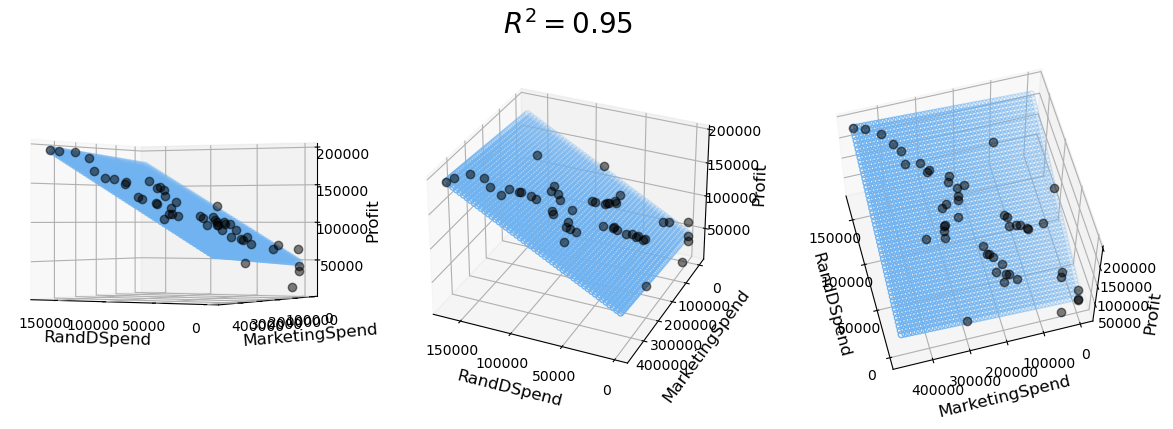

In [38]:
############################################## Plot ################################################

from mpl_toolkits.mplot3d import Axes3D

plt.style.use('default')

fig = plt.figure(figsize=(12, 4))

ax1 = fig.add_subplot(131, projection='3d')
ax2 = fig.add_subplot(132, projection='3d')
ax3 = fig.add_subplot(133, projection='3d')

axes = [ax1, ax2, ax3]

for ax in axes:
    ax.plot(x, y, z, color='k', zorder=15, linestyle='none', marker='o', alpha=0.5)
    ax.scatter(xx_pred.flatten(), yy_pred.flatten(), predicted, facecolor=(0,0,0,0), s=20, edgecolor='#70b3f0')

    ax.set_xlabel('RandDSpend', fontsize=12)
    ax.set_ylabel('MarketingSpend', fontsize=12)
    ax.set_zlabel('Profit', fontsize=12)

    ax.locator_params(nbins=4, axis='x')
    ax.locator_params(nbins=5, axis='x')



ax1.view_init(elev=0, azim=120)
ax2.view_init(elev=30, azim=114)
ax3.view_init(elev=60, azim=165)

fig.suptitle('$R^2 = %.2f$' % r2, fontsize=20)

fig.tight_layout()

# In general, the higher the R-squared, the better the model fits your data.
model 1 r2 value= 0.95074
model 2 r2 value=0.95045

thus both values are almost same, i.e. Administration spend does not affect our Profit prediction majorly.
thus even if we eliminate it from our model, the results are pretty similar !

Any model from above can be used for prediction.

# Prediction

In [40]:
#model 1
y_pred = model2.predict([[100000,58000]])
y_pred

array([128368.92538825])

In [41]:
#model 2
y_pred = model2.predict([[100000,58000]])
y_pred

array([128368.92538825])